<a href="https://colab.research.google.com/github/SCK22/ModelBuilding/blob/master/TF_Fashion_MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Networks Compete

## Achieving more realistic results

In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def normalize(X):
    X = X.reshape(len(X), 784)
    X = X.astype('float32')/255
    return X

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = normalize(X_train)

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
input_dim = 100
np.random.seed(42)
optimizer = Adam(lr=0.0002, beta_1=0.5)

gen = Sequential()
gen.add(Dense(256, input_dim=input_dim))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(512))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(1024))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(784, activation='sigmoid'))
gen.compile(loss='binary_crossentropy', 
            optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
__________

In [5]:
dsc = Sequential()
dsc.add(Dense(1024, input_dim=784))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(512))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(256))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(1, activation='sigmoid'))  
dsc.compile(loss='binary_crossentropy', 
            optimizer=optimizer)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
dsc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

In [0]:
def make_trainable(dnn, flag):
    dnn.trainable = flag
    for l in dnn.layers:
        l.trainable = flag
        
make_trainable(dsc, False)
inputs = Input(shape=(input_dim, ))
hidden = gen(inputs)
output = dsc(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy',
            optimizer=optimizer)

In [8]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1493520   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,953,745
Trainable params: 1,489,936
Non-trainable params: 1,463,809
_________________________________________________________________


In [0]:
def create_noise(n, z):
    return np.random.normal(0, 1, size=(n, z))

def plot_sample(n, z):
    samples = gen.predict(create_noise(n, z))
    plt.figure(figsize=(15,3))
    for i in range(n):
        plt.subplot(1, n, (i+1))
        plt.imshow(samples[i].reshape(28, 28), 
                   cmap='gray_r')
        plt.axis('off')
    plt.show()  

Instructions for updating:
Use tf.cast instead.
Time taken : 0:00:24.710401
Epoch 0


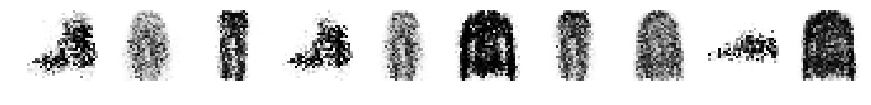

Time taken : 0:00:19.462689
Time taken : 0:00:19.302956
Time taken : 0:00:19.371964
Time taken : 0:00:20.069624
Time taken : 0:00:19.580533
Time taken : 0:00:19.212344
Time taken : 0:00:19.392400
Time taken : 0:00:19.638961
Time taken : 0:00:19.919811
Time taken : 0:00:19.435888
Epoch 10


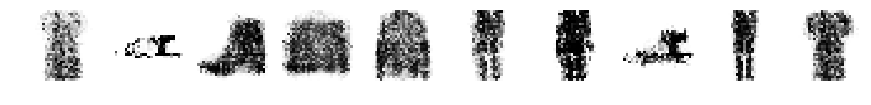

Time taken : 0:00:19.368200
Time taken : 0:00:19.582001
Time taken : 0:00:20.191938
Time taken : 0:00:20.607170
Time taken : 0:00:19.879212
Time taken : 0:00:19.532967
Time taken : 0:00:20.028919
Time taken : 0:00:19.235942
Time taken : 0:00:19.344144
Time taken : 0:00:19.439965
Epoch 20


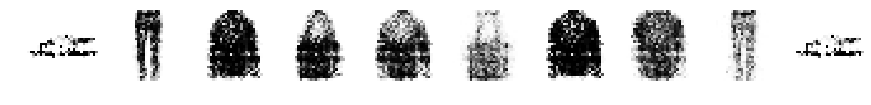

Time taken : 0:00:20.290958
Time taken : 0:00:19.335721
Time taken : 0:00:19.286684
Time taken : 0:00:19.244165
Time taken : 0:00:20.322590
Time taken : 0:00:19.292104
Time taken : 0:00:19.275541
Time taken : 0:00:19.264090
Time taken : 0:00:20.335711
Time taken : 0:00:20.763843
Epoch 30


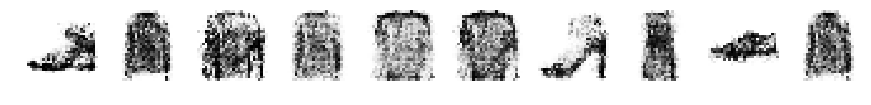

Time taken : 0:00:19.616164
Time taken : 0:00:19.220878
Time taken : 0:00:20.241691
Time taken : 0:00:19.388006
Time taken : 0:00:19.306148
Time taken : 0:00:19.311092
Time taken : 0:00:20.267465
Time taken : 0:00:19.078868
Time taken : 0:00:19.010238
Time taken : 0:00:19.289709
Epoch 40


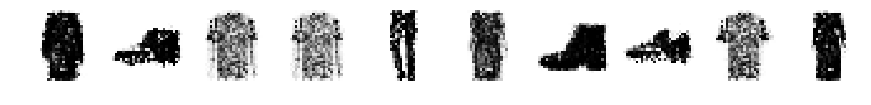

Time taken : 0:00:20.408355
Time taken : 0:00:19.230993
Time taken : 0:00:19.316713
Time taken : 0:00:19.300290
Time taken : 0:00:20.228795
Time taken : 0:00:20.630599
Time taken : 0:00:19.111361
Time taken : 0:00:19.086909
Time taken : 0:00:19.794865
Time taken : 0:00:19.520120
Epoch 50


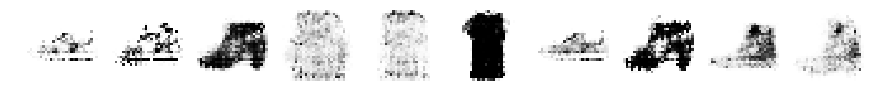

Time taken : 0:00:19.015398
Time taken : 0:00:18.996682
Time taken : 0:00:19.509262
Time taken : 0:00:19.766644
Time taken : 0:00:18.997880
Time taken : 0:00:19.133942
Time taken : 0:00:19.224838
Time taken : 0:00:20.091406
Time taken : 0:00:19.343119
Time taken : 0:00:19.151474
Epoch 60


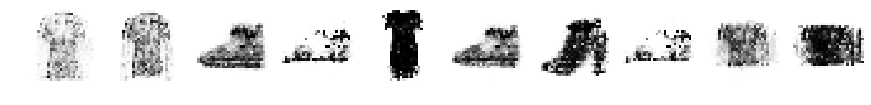

Time taken : 0:00:19.992672
Time taken : 0:00:20.499141
Time taken : 0:00:19.185566
Time taken : 0:00:19.151993
Time taken : 0:00:19.182794
Time taken : 0:00:20.133021
Time taken : 0:00:19.018995
Time taken : 0:00:19.053355
Time taken : 0:00:19.062749
Time taken : 0:00:20.163912
Epoch 70


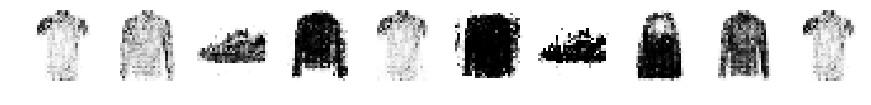

Time taken : 0:00:19.259095
Time taken : 0:00:19.066830
Time taken : 0:00:19.039354
Time taken : 0:00:20.181412
Time taken : 0:00:18.972594
Time taken : 0:00:19.016089
Time taken : 0:00:19.955878
Time taken : 0:00:20.614152
Time taken : 0:00:19.009770
Time taken : 0:00:19.041276
Epoch 80


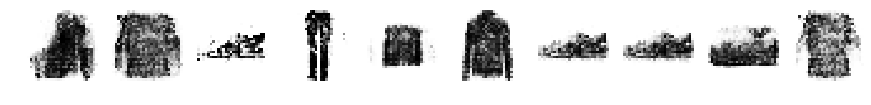

Time taken : 0:00:19.128005
Time taken : 0:00:20.083783
Time taken : 0:00:19.610943
Time taken : 0:00:19.088830
Time taken : 0:00:19.108405
Time taken : 0:00:19.500708
Time taken : 0:00:19.778462
Time taken : 0:00:19.141348
Time taken : 0:00:19.054472
Time taken : 0:00:19.205744
Epoch 90


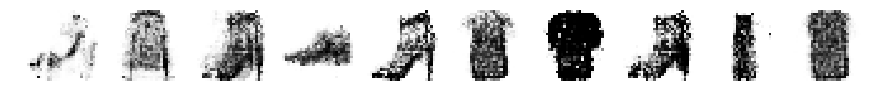

Time taken : 0:00:20.123937
Time taken : 0:00:19.061403
Time taken : 0:00:20.604227
Time taken : 0:00:19.287693
Time taken : 0:00:20.290977
Time taken : 0:00:19.235316
Time taken : 0:00:19.183757
Time taken : 0:00:19.209045
Time taken : 0:00:20.299639


In [10]:
from datetime import datetime
epochs = 100
batch_size = 128
batch_no = int(len(X_train) / batch_size)
gen_errors, dsc_errors = (list(), list())


for i in range(0, epochs):
    start = datetime.now()
    for j in range(batch_no): 
        # Drawing a random sample of the training set
        rand_sample = np.random.randint(0, len(X_train), size=batch_size)
        image_batch = X_train[rand_sample]
        
        # Creating noisy inputs for the generator
        input_noise = create_noise(batch_size, input_dim)

        # Generating fake images from the noisy input
        generated_images = gen.predict(input_noise)
        X = np.concatenate((image_batch, generated_images))
        
        # Creating somehow noisy labels
        y = np.concatenate([[0.9]*batch_size, [0.0]*batch_size])

        # Training discriminator to distinguish fakes from real ones
        make_trainable(dsc, True)
        dsc_loss = dsc.train_on_batch(X, y)
        make_trainable(dsc, False)

        # Trainining generating fakes
        input_noise = create_noise(batch_size, input_dim)
        fakes = np.ones(batch_size)
        for _ in range(4):
          gen_loss = gan.train_on_batch(input_noise, fakes)

    # Recording the losses
    gen_errors.append(gen_loss)
    dsc_errors.append(dsc_loss)
    print("Time taken : {}".format(str(datetime.now()-start)))
    # Showing intermediate results
    if i % 10 == 0:
      print("Epoch %i" % i)
      plot_sample(10, input_dim)

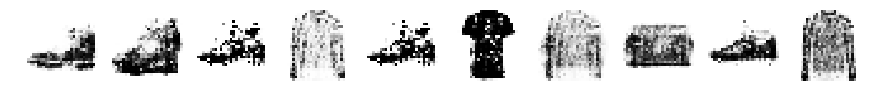

In [11]:
# Plotting the final result
plot_sample(10, input_dim)

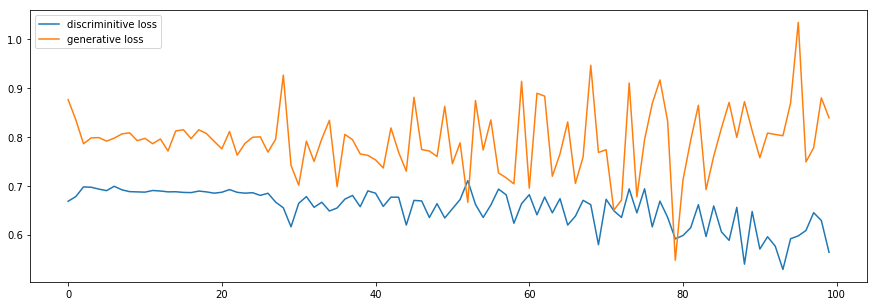

In [12]:
# Plotting the errors
plt.figure(figsize=(15, 5))
plt.plot(dsc_errors, label='discriminitive loss')
plt.plot(gen_errors, label='generative loss')
plt.legend()
plt.show()